In [1]:
#basic libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier



In [2]:
#!pip install tensorflow==2.7.0

In [3]:
#!pip install keras==2.7.0

In [4]:
#!pip install pydot

In [5]:
#Digit MNIST dataset
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [6]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

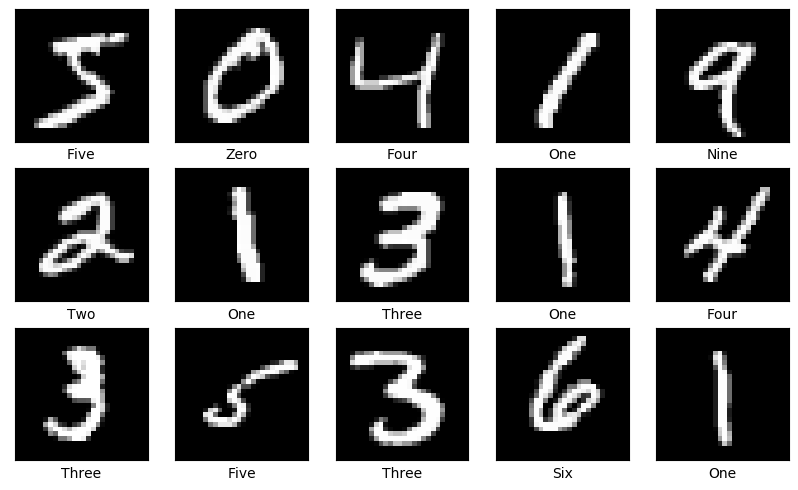

In [10]:
#names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):  #15rows
    plt.subplot(5,5,i+1) #5*3
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray') #imshow--for showing image
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()


In [11]:
x_train_digit.shape   #3dimension #preprocess this and convert to 2dimension
#shape(rows,columns) 

(60000, 28, 28)

In [12]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [13]:
x_train_digit.shape

(60000, 784)

In [14]:
y_test_digit.shape    

(10000,)

In [15]:
#Encoding digit MNIST labels
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [16]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [18]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [20]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 1.3725 - accuracy: 0.8659 - val_loss: 0.3070 - val_accuracy: 0.9249
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2267 - accuracy: 0.9416 - val_loss: 0.2367 - val_accuracy: 0.9409
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1499 - accuracy: 0.9584 - val_loss: 0.1991 - val_accuracy: 0.9508
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1146 - accuracy: 0.9671 - val_loss: 0.1880 - val_accuracy: 0.9549
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1031 - accuracy: 0.9699 - val_loss: 0.1668 - val_accuracy: 0.9613
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.9744 - val_loss: 0.1720 - val_accuracy: 0.9587
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.1836 - val_accuracy: 0.9567
Epoch 

In [21]:
#predicting the labels-DIGIT
y_predict=model.predict(x_test_digit)

In [22]:
y_predict[0]

array([1.1307231e-07, 4.0268475e-05, 1.2591481e-04, 4.0786922e-02,
       2.3064017e-04, 1.5102791e-11, 1.5911460e-04, 9.9996173e-01,
       2.4032593e-04, 4.9213767e-03], dtype=float32)

In [23]:
y_predicts=np.argmax(y_predict, axis=1)
# Here we get the index of maximum value in the encoded vector

In [24]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [26]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

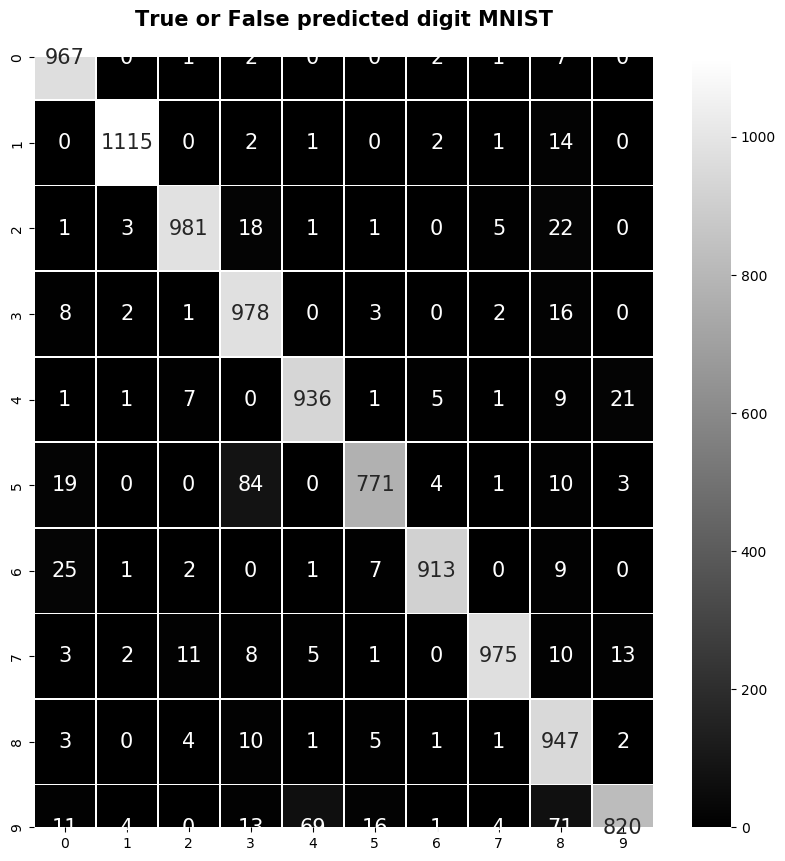

In [27]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.88      0.97      0.92      1010
           4       0.92      0.95      0.94       982
           5       0.96      0.86      0.91       892
           6       0.98      0.95      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.85      0.97      0.91       974
           9       0.95      0.81      0.88      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



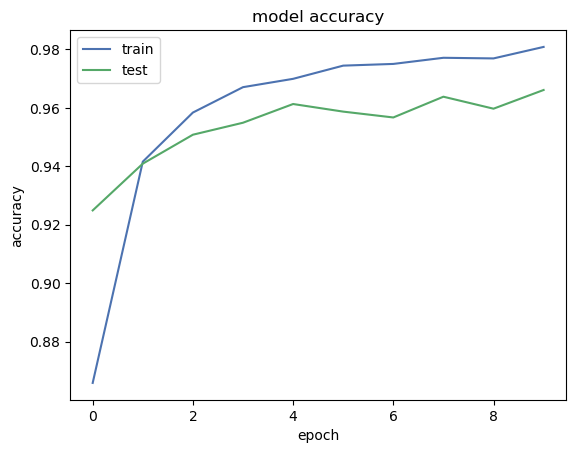

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

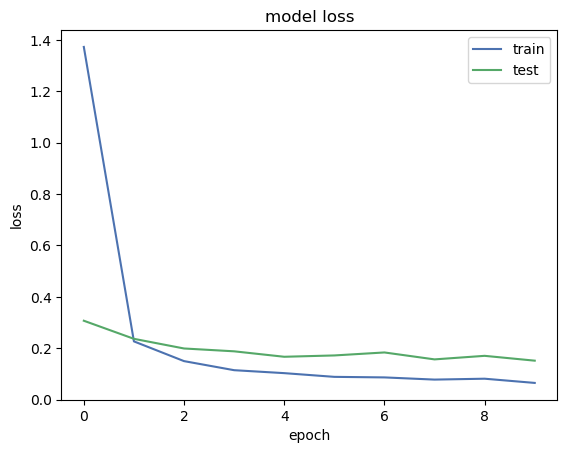

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [32]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

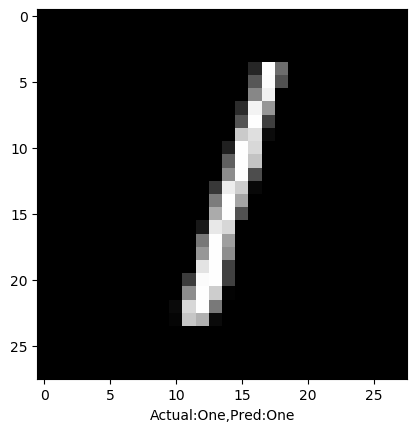

In [34]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()